#### Handling Sequential Data

#### Splitting the dataset into train - test data

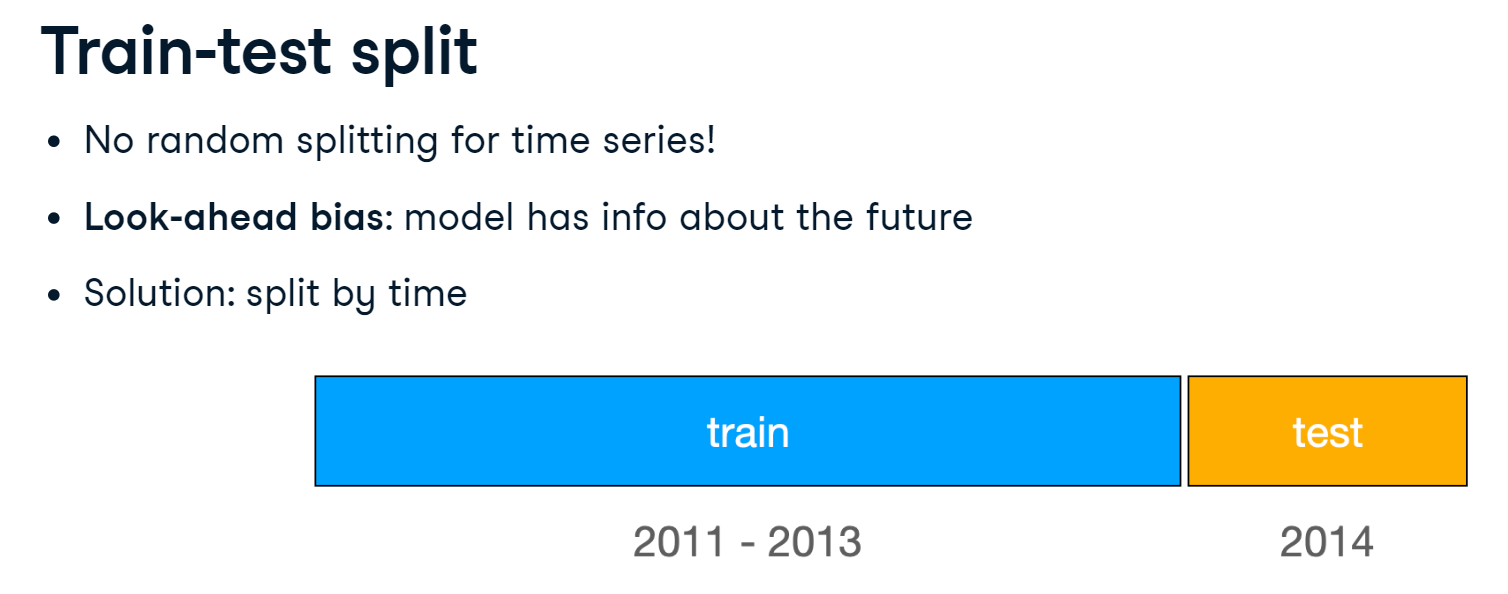

To fit the training data to the model, we need to chunk it first to create sequences so that the model can use it as training examples. 

First, we select the sequence length that is the sequence length, which is the number of data points in one training example. 

Since data in our example is at 15 minutes intervals, we can use a day's worth of data, that is 24*4 = 96 data points. 

In eacch example, the datapoint right after the input sequence will be teh target to predict.

In [28]:
# Example 

import numpy as np

def create_sequences(df, seq_length):
    # xs is the x sequence (list of lists contianing input features sequence)
    # ys is the y sequence (list contining output feature sequence)
    xs, ys = [], []
    for i in range(len(df)-seq_length):
        x = df.iloc[i:(i+seq_length), 1]
        y = df.iloc[i+seq_length, 1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [33]:
X_train, y_train = create_sequences(train_data, seq_length)
print(X_train.shape, y_train.shape)

(140160, 96) (140160,)


In [ ]:
import torch
from torch.utils.data import TensorDataset

dataset_train = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float(),
)

The same method can be applied to other sequence data like -

- data for llms
- speech recognition data